In [17]:
import pvxarray
import xarray as xr
import numpy as np
import pandas as pd
from src import *
import verde

%matplotlib inline

In [11]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
%reload_ext autoreload

In [13]:
quadricula =Build_mc('50k',['SF23_YB_III4'],verbose=True)

100%|██████████| 1/1 [00:00<00:00, 163.09it/s]


 - Folhas selecionadas:


1it [00:00, 190.64it/s]

"SF23_YB_III4"

  1 folhas adicionadas.


In [14]:
quadricula['SF23_YB_III4']

{'folha': EPSG                                                         32723
 geometry         POLYGON ((-45.25 -22.25, -45 -22.25, -45 -22.5...
 geometry_proj    POLYGON ((474240.2048290715 7539479.844574926,...
 Name: SF23_YB_III4, dtype: object}

In [15]:
Upload_geof(quadricula,'gama_line_1105','mag_line_1105',1000)

  0%|          | 0/1 [00:00<?, ?it/s]


KeyError: 'area'

In [ ]:
from verde import grid_coordinates

def batch_grid_coordinates(quadricula,spacing=0.001,pixel_register=True):
    list_id = list(quadricula.keys())
    #print(f' Folhas disponíveis: {list_id}')
    for id in list_id:
        folha = quadricula[id]
        print(f' Folha  {id}')

        df = quadricula[id]['area']
        area = (df['geometry'].bounds[0],df['geometry'].bounds[2],
                df['geometry'].bounds[1],df['geometry'].bounds[3])
        
        xu,yu = grid_coordinates(region=area,spacing=spacing,pixel_register=pixel_register)
       
        df['coords'] = xu,yu
        df['area'] = area
        x={'area':df}
        quadricula[id].update(x)

batch_grid_coordinates(quadricula)

In [ ]:
traditional_interpolation(quadricula,'mag_line_1105','gama_line_1105','cubic','geof_1105','geog',True)

In [ ]:
ds =quadricula['SF23_YB_III4']['geof_1105_linear']

In [ ]:
ds

# Xarray - more then pandas in multiple dimensions

In [ ]:
ds.coords['LATITUDE']

In [ ]:
ds.MDT.plot(figsize=(16,16),cmap='terrain')
plt.axis('scaled')

In [ ]:
ds.UTHRAZAO.plot(figsize=(12,12),cmap='bwr')
plt.axis('scaled')

In [ ]:
ds

In [16]:
traditional_interpolation(quadricula,'mag_line_1105','gama_line_1105','cubic','geof_1105','geog',True)

100%|██████████| 1/1 [00:00<00:00, 26214.40it/s]


In [66]:
quadricula['SF23_YB_III4'].keys()

dict_keys(['area', 'region_utm', 'gama_line_1105', 'mag_line_1105', 'geof_1105_linear', 'geof_1105_cubic'])

In [67]:
quadricula['SF23_YB_III4']['geof_1105_cubic'].keys()

KeysView(<xarray.Dataset>
Dimensions:    (LATITUDE: 250, LONGITUDE: 250)
Coordinates:
  * LATITUDE   (LATITUDE) float64 -22.5 -22.5 -22.5 ... -22.25 -22.25 -22.25
  * LONGITUDE  (LONGITUDE) float64 -45.25 -45.25 -45.25 ... -45.0 -45.0 -45.0
Data variables:
    MDT        (LATITUDE, LONGITUDE) float64 1.406e+03 1.402e+03 ... 974.3 975.1
    CTCOR      (LATITUDE, LONGITUDE) float64 -34.51 -39.45 -39.9 ... 10.8 11.34
    KPERC      (LATITUDE, LONGITUDE) float64 -2.206 -2.556 ... 0.218 0.242
    eU         (LATITUDE, LONGITUDE) float64 -27.55 -31.47 ... 2.792 2.754
    eTh        (LATITUDE, LONGITUDE) float64 -111.9 -125.1 ... 25.03 25.03
    GMT        (LATITUDE, LONGITUDE) float64 -55.99 -56.06 ... 6.438 7.118
    UTHRAZAO   (LATITUDE, LONGITUDE) float64 -3.061 -3.517 ... 0.08556 0.08605
    UKRAZAO    (LATITUDE, LONGITUDE) float64 14.85 11.75 9.224 ... 8.258 8.041
    THKRAZAO   (LATITUDE, LONGITUDE) float64 659.9 731.2 733.8 ... 96.63 93.6)

In [78]:
SF23_YB_III4 = quadricula['SF23_YB_III4']['gama_line_1105']
SF23_YB_III4

,X,Y,LATITUDE,LONGITUDE,CTCOR,eU,eTh,KPERC,UTHRAZAO,THKRAZAO,UKRAZAO,MDT
673443,473400.45,7484778.17,-22.744158,-45.259068,13.037,5.652,23.582,0.001,0.183,214.723,39.299,574.88
673444,473397.23,7484849.19,-22.743516,-45.259098,12.573,6.094,20.672,0.161,0.194,155.985,30.274,566.81
673445,473393.19,7484919.56,-22.742881,-45.259137,12.034,4.037,20.507,0.001,0.201,111.075,22.373,562.13
673446,473388.64,7484988.77,-22.742255,-45.259180,12.114,1.954,23.725,0.001,0.207,78.301,16.198,559.74
673447,473378.77,7485192.05,-22.740419,-45.259272,11.178,3.426,13.201,0.618,0.238,27.340,6.503,557.19
...,...,...,...,...,...,...,...,...,...,...,...,...
1169654,602874.51,7526876.45,-22.360971,-44.000843,5.532,0.373,15.020,0.509,0.059,39.739,2.343,571.23
1169655,602872.51,7526806.94,-22.361599,-44.000858,5.043,0.549,14.462,0.315,0.061,47.230,2.877,578.02
1169656,602871.22,7526737.54,-22.362226,-44.000866,6.422,1.005,17.569,0.282,0.063,58.969,3.712,581.39
1169657,602870.35,7526668.02,-22.362854,-44.000870,8.287,1.347,20.376,0.399,0.065,79.214,5.155,577.24


(-45.3242695, -43.9376865, -23.837951800000003, -22.1618642)

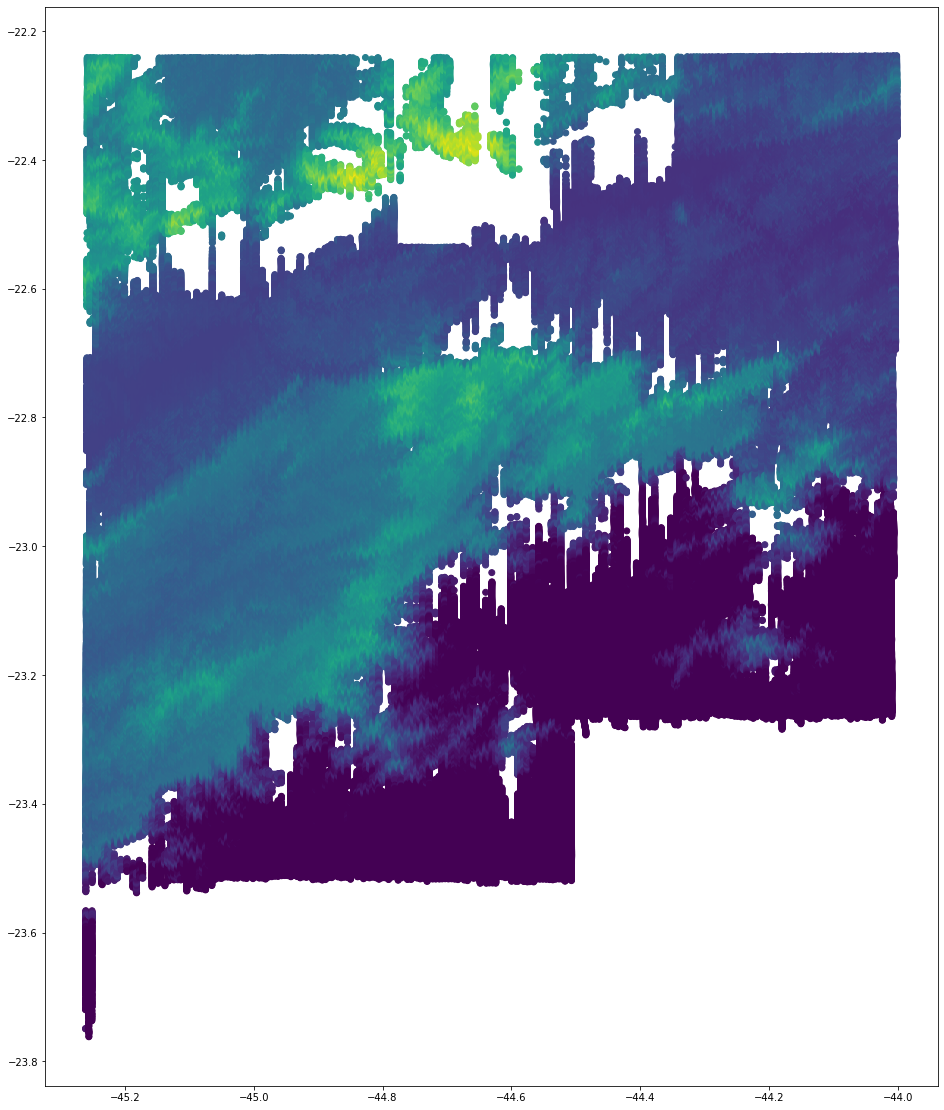

In [83]:
plt.figure(figsize=(16,24))
plt.scatter(SF23_YB_III4.LONGITUDE, SF23_YB_III4.LATITUDE, c=SF23_YB_III4.MDT)
plt.axis('scaled')

In [68]:
df_b = quadricula['SF23_YB_III4']['geof_1105_cubic']
df_b

<xarray.Dataset>
Dimensions:    (LATITUDE: 250, LONGITUDE: 250)
Coordinates:
  * LATITUDE   (LATITUDE) float64 -22.5 -22.5 -22.5 ... -22.25 -22.25 -22.25
  * LONGITUDE  (LONGITUDE) float64 -45.25 -45.25 -45.25 ... -45.0 -45.0 -45.0
Data variables:
    MDT        (LATITUDE, LONGITUDE) float64 1.406e+03 1.402e+03 ... 974.3 975.1
    CTCOR      (LATITUDE, LONGITUDE) float64 -34.51 -39.45 -39.9 ... 10.8 11.34
    KPERC      (LATITUDE, LONGITUDE) float64 -2.206 -2.556 ... 0.218 0.242
    eU         (LATITUDE, LONGITUDE) float64 -27.55 -31.47 ... 2.792 2.754
    eTh        (LATITUDE, LONGITUDE) float64 -111.9 -125.1 ... 25.03 25.03
    GMT        (LATITUDE, LONGITUDE) float64 -55.99 -56.06 ... 6.438 7.118
    UTHRAZAO   (LATITUDE, LONGITUDE) float64 -3.061 -3.517 ... 0.08556 0.08605
    UKRAZAO    (LATITUDE, LONGITUDE) float64 14.85 11.75 9.224 ... 8.258 8.041
    THKRAZAO   (LATITUDE, LONGITUDE) float64 659.9 731.2 733.8 ... 96.63 93.6

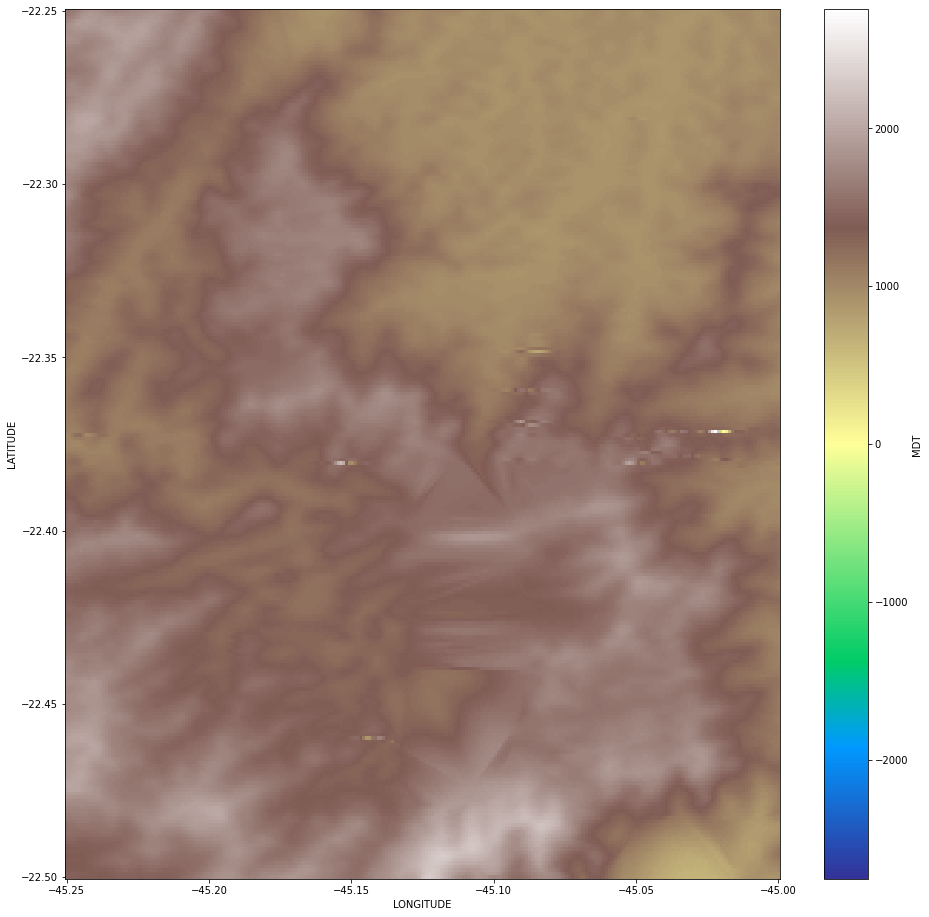

In [70]:
df_b.MDT.plot(figsize=(16,16),cmap='terrain')